In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.ticker as mtick
results_notNoised = stddevs_notNoised = means_notNoised = []
results_Noised = stddevs_Noised = means_Noised = []

In [241]:
stddevs = []
means = []
results = []
fig, ax = plt.subplots(3, 3)
plt.subplots_adjust(top=2, bottom=0.3, left=0.2, right=1.7, hspace=0.5,
                    wspace=0.35)

counter = 0
for i in [2, 4, 8, 16, 32, 64, 128, 256, 512]:
    axis = ax[counter//3][counter%3]
    counter += 1
    result = pd.read_csv("./Results/CAE/Damavand/Not Noised/encoded_results_0.01_{0}.csv".format(i), header=None)
#     result *= 1000
    sns.distplot(result, ax=axis, hist=False)
    axis.set_xlabel("MSE")
    axis.set_ylabel("Density")
    axis.set_title("k = {0} (Noised)".format(i))
    axis.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
#     axis.set_xlim(0, 0.01)
#     plt.title("Distribution for k = {0} features (stddev = 0.01)".format(i))
#     plt.savefig("./Results/CAE/Plots/dist_{0}_{1}.png".format(i, 0.01))
#     results_Noised.append(result.as_matrix())
#     stddevs_Noised.append(float(result.std()))
#     means_Noised.append(float(result.mean()))
    print(float(result.std()))
#     print("*" * 100)
#     print(stddevs_Noised)
    
#     plt.show()
#     plt.close()
# plt.show()
# print(len(stddevs_Noised))

0.0003963828285213446
0.0020708453306583488
0.001679676910565967
0.001674362213100294
0.0011288460564793843
0.0009589666609831014
0.000963845398923523
0.0013471442578318518
0.0011605178819063


In [300]:
stddevs_Noised = [2.8435347497355513e-06,
1.5554714279757235e-06,
1.1143827715404431e-05,
1.8232802525185423e-06,
3.884619818057103e-06,
1.7036812521914786e-06,
2.421802745935197e-06,
2.795630126148747e-06,
5.5744673296210184e-06]
means_Noised = [0.002912763851428054,
0.0025378024576857322,
0.0022574064646258794,
0.002012189038682105,
0.0018922037311414647,
0.0018188899040380221,
0.0017663696144868187,
0.0017623889679081995,
0.0017410365731999448]
stddevs_notNoised = [0.0003963828285213446,
0.0020708453306583488,
0.001679676910565967,
0.001674362213100294,
0.0011288460564793843,
0.0009589666609831014,
0.000963845398923523,
0.0013471442578318518,
0.0011605178819063
]
means_notNoised = [0.22548357228751742,
0.20736051241287834,
0.13623937950810083,
0.09123128155271285,
0.05371212005235773,
0.030780418614815723,
0.025242954433136327,
0.024470812720814993,
0.022191869716543588]

In [199]:
x = [2, 4, 8, 16, 32, 64, 128, 256, 512]
data = [
    go.Scatter(
        x=x,
        y=means,
        error_y=dict(
            type='data',
            array=stddevs,
            visible=True
        )
    )
]

py.iplot(data, filename='basic-error-bar')

In [299]:
# for i in range(len(results)):
#     results[i] = results[i][~np.isnan(results[i])]

# group_labels = [str(x_i) for x_i in x]
# fig = ff.create_distplot(results, group_labels, bin_size=.2)
# py.iplot(fig)

In [298]:
# data = [
#     go.Scatter(
#         x=x,
#         y=means,
#         error_y=dict(
#             type='data',
#             symmetric=False,
#             array=stddevs,
#             arrayminus=stddevs
#         )
#     )
# ]

# layout= go.Layout(
#     xaxis= dict(
#         title= '# of selected features',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
#     yaxis=dict(
#         title= 'MSE +/- stddev',
#         ticklen= 5,
#         gridwidth= 2,
#     ),
#     showlegend= False
# )
# fig= go.Figure(data=data, layout=layout)
# py.iplot(fig)



In [76]:
import shap
code_layer = pd.read_csv("./Results/CAE/old/encoded_scae_dropout.csv", header=None)
shap_values = pd.read_csv('./dec_shap_values.csv', header=None)
# shap.summary_plot(shap_values.as_matrix())

In [301]:
stddevs_Noised = np.multiply(7, stddevs_Noised)
stddevs_notNoised = np.multiply(7, stddevs_notNoised)

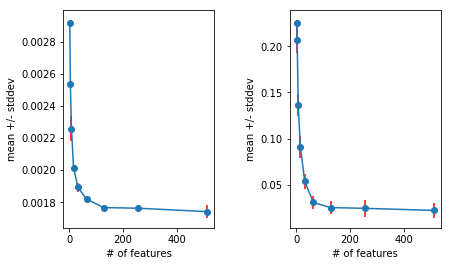

In [302]:
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(wspace=.5, right=1)

ax[0].errorbar(x, means_Noised, yerr=stddevs_Noised, fmt='-o', ecolor='r')
ax[0].set_xlabel("# of features")
ax[0].set_ylabel("mean +/- stddev")

ax[1].errorbar(x, means_notNoised, yerr=stddevs_notNoised, fmt='-o', ecolor='r', capthick=1)
ax[1].set_xlabel("# of features")
ax[1].set_ylabel("mean +/- stddev")

plt.show()

In [15]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, GaussianNoise, Dropout, BatchNormalization, GaussianDropout
import keras.backend as backend


n_random_features = 2

In [8]:
m_rna = [[0 for _ in range(19671)] for _ in range(10787)]
m_rna = pd.DataFrame(m_rna)
m_rna.shape

(10787, 19671)

In [16]:
def create_model():
    inputs = Input(shape=(n_random_features,), name="inputs")
    inputs_noise = GaussianNoise(stddev=0.025)(inputs)
    inputs_noise = GaussianDropout(rate=0.025 ** 2 / (1 + 0.025 ** 2))(inputs_noise)
    inputs_0 = BatchNormalization(name="inputs_0")(inputs_noise)
    inputs_0 = Dropout(rate=0.0, name='dropout_1')(inputs_0)
    inputs_1 = Dense(1024, activation="softplus", name="inputs_1")(inputs_0)
    inputs_2 = BatchNormalization(name="inputs_2")(inputs_1)
    inputs_2 = Dropout(rate=0.0, name='dropout_2')(inputs_2)
    inputs_3 = Dense(256, activation="softplus", name="inputs_3")(inputs_2)
    inputs_4 = BatchNormalization(name="inputs_4")(inputs_3)
    inputs_4 = Dropout(rate=0.25, name='dropout_3')(inputs_4)

    encoded = Dense(units=12, activation='sigmoid', name='encoded')(inputs_4)
    encoded_noise = GaussianNoise(0.025)(encoded)

    # encoded_softmax = Dense(units=12, activation='softmax', name='encoded_softmax')(encoded)
    # encoded_attention = multiply([encoded, encoded_softmax])

    inputs_5 = Dense(512, activation="linear", name="inputs_5")(encoded_noise)
    inputs_5 = Dropout(rate=0.25, name='dropout_4')(inputs_5)

    decoded_tcga = Dense(units=m_rna.shape[1], activation='relu', name="m_rna")(inputs_5)
    cl_2 = Dense(units=34, activation="softmax", name="cl_disease")(encoded_noise)

    scae = Model(inputs=inputs, outputs=[decoded_tcga, cl_2])

    lambda_value = 9.5581e-3

    def contractive_loss(y_pred, y_true):
        mse = backend.mean(backend.square(y_true - y_pred), axis=1)

        w = backend.variable(value=scae.get_layer('encoded').get_weights()[0])  # N inputs N_hidden
        w = backend.transpose(w)  # N_hidden inputs N
        h = scae.get_layer('encoded').output
        dh = h * (1 - h)  # N_batch inputs N_hidden

        # N_batch inputs N_hidden * N_hidden inputs 1 = N_batch inputs 1
        contractive = lambda_value * backend.sum(dh ** 2 * backend.sum(w ** 2, axis=1), axis=1)

        return mse + contractive

    # scae.compile(optimizer='nadam',
    #              loss=[contractive_loss, "mse", "cosine_proximity", "cosine_proximity"],
    #              loss_weights=[0.001, 0.001, 0.5, 0.5],
    #              metrics={"m_rna": ["mae", "mse"], "mi_rna": ["mae", "mse"], "cl_tissue": "acc",
    #                       "cl_disease": "acc"})

    scae.compile(optimizer='nadam',
                 loss=[contractive_loss, "mse"],
                 loss_weights=[0.001, 0.001],
                 metrics={"m_rna": ["mae", "mse"], "cl_disease": "acc"})

    return scae

model = create_model()

In [17]:
model.load_weights("./model_weights.h5")

In [54]:
weights = np.array(model.get_weights())

In [73]:
# weights = pd.DataFrame(weights)
new_weights = []
for i in range(weights.shape[0]):
    new_weights.append(list(weights[i].flatten()))

In [86]:
flat_list = []
for sublist in new_weights:
    for item in sublist:
        flat_list.append(item)
weights = pd.DataFrame(flat_list)
weights.describe()

,0
count,1.037200e+07
mean,3.658574e-04
std,4.101571e-02
min,-1.430881e+00
25%,-8.355156e-03
50%,3.096962e-05
75%,8.397587e-03
max,2.326126e+01


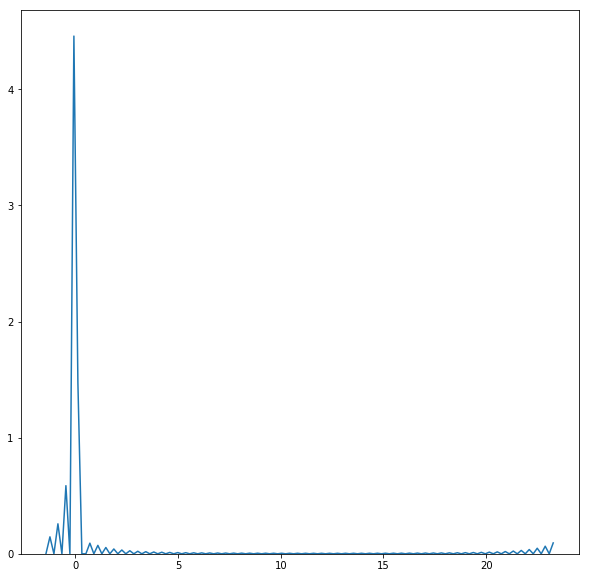

In [87]:
plt.figure(figsize=(10, 10))
sns.distplot(weights, hist=False)
# plt.xlim(-1, 1)
plt.show()